## Nuclear explosions from Data is Plural:

JSVine describes the data: 

    "Explosions listed in the **Stockholm International Peace Research Institute’s “Nuclear Explosions, 1945–1998” (PDF) report.** Both datasets list the date and location of each explosion, the country responsible, the detonation site, and (where known) its explosive yield, among other variables. And both reports use unconventional formatting, so I’ve extracted a couple of CSVs for you."

CSVs from Jeremy Singer Vine's site: https://github.com/data-is-plural/nuclear-explosions/blob/master/
    
## Data Dictionary: 

#### DATE
                (UTC time) yymmdd, yy=year-1900, mm=month, dd=day of month

#### TP : Testing Party
                  US=United States, GB=UK, CP=USSR, FR=France, IN=India
                  PC=People's Republic of China
                  IS=Israel, but the 790922 event is only putative
                  PK=Pakistan
                  NK=North Korea
                  
#### Test or explosion site

    Note that the UK Christmas Island site has been used for some US atmospheric tests. In exchange, the US has allowed
    the UK to conduct underground tests at the Nevada Test Site.
  
      ANM= Alamogordo, New Mexico, USA (US atmospheric test)
      HRJ= Hiroshima, Japan (US/warfare)
      NGJ= Nagasaki, Japan (US/warfare)
      BKN= Bikini (US atmospheric tests)
      ENW= Enwetak (US atmospheric tests)
      CNV= Centra Nevada (US underground test)
      NTS= Nevada Test Site, Nevada, USA (US atmospheric and underground and
                                      UK underground tests)
      FMT= Farmington, New Mexico (US underground natural gas stimulation test)
      MBI= Monte Bello Islands, Australia (UK atmospheric test)
      EMU= Emu Field, 480 kilometers SW of Woomera, Australia (UK atmospheric tests)
      PAC= Various Pacific Ocean sites
      MAR= Maralinga, Australia (UK atmospheric tests)
      CHR= Christmas Island (UK and US atmospheric tests)
      NZ = Novaya Zemlya, USSR (USSR atmospheric and underground tests)
      KTS= Eastern Kazakh or Semipalitinsk test site, USSR (USSR atmospheric and
                                                        underground tests)
      REG= Reggane Proving Grounds, Algeria (French Atmospheric Tests)
      ECK= Ecker, Algeria (French Underground tests)
      CLS= Carlsbad, New Mexico, USA (US underground test)
      JON= Johnston Island (US atmospheric tests)
      FAL= Fallon, Nevada, USA (US underground test)
      LNR= Lop Nor, PRC (PRC atmospheric and underground tests)
      AMC= Amchitka Island, Aleutians, Alaska, USA (US underground tests)
      MUR= Muruora Is. (French atmospheric and underground tests)
      FAN= Fangataufa Is. (French atmospheric and underground tests)
      HTB= Hattiesburg, Mississippi, USA (US underground tests)
      GRV= Grand Valley, Colorado, USA (US natural gas stimulation)
      RAJ= Pokhran, Rajasthan Desert, India (Indian underground test)
      IS?IN= Indian Ocean (putative Israeli Test)
      RFL= Rifle, Colorado, USA (3x33kt simultaneous gas stimulation shots)
      SAT= South Atlantic Ocean (three US tests, rocket to 482 kilometers altitude)
      MAL= Malden Island (UK atmospheric tests)
      KPY= Kapustin Yar (USSR)
      SYS= Sary Shagan (USSR)
      YAK= Various sites in Yakutia (USSR)
      CHA= Chagai Hills, Dist. of Quetta, Baluchistan, Pakistan (PK underground)

      USSR sites other than NZ and KTS. A large number of blasts, some or many
       of which were for engineering purposes (possibly similar to US
       Plowshare tests) were fired underground at many locations. Latitude
       and Longitude for most of these are given in the tables. These tests,
       US plowshare tests, and the one Indian test, were announced by the
       testing parties to be PNEs (Peaceful Nuclear Explosions). 

#### TYPE

      AIRD=airdrop
      ART =artillery shell
      ATMO=in or above the atmosphere
      BALN=balloon
      BARG=barge
      CRAT=crater
      RC  ="roman candle"=open vertical shaft
      ROCH=rocket
      SHFT=stemmed vertical shaft
      SS1 =simultaneous shot in shaft 1
      SS2 =simultaneous shot in shaft 2
      SSn =simultaneous shot in shaft n
           (If several simultaneous tests were in the same shaft [usually at
            different depths] they will all be listed SS1. If three were shot 
            simultaneously in three separate shafts they will be SS1, SS2, 
            and SS3).
      SURF=surface (unknown but probably not airdropped, near surface, includes
                    tower and barge)
      TOWR=tower
      TUNN=tunnel
      UNDW=underwater
      
#### Explosive Yield (in Kilotons)

               NOTE decimal points are not all
               lined up vertically. This could be a problem in any machine
               processing as could l, g, LOW, HIGH, -, SLIGHT, FIZZ.
               Unless there is a single number
               without a l, g, or - , assume the yield is unknown and very 
               approximate.
               FIZZ=fizzle or failure with extremely low yield. F followed by
               a number, eg F300, is a test which had a smaller yield than
               expected. Apparently some fizzles were two-stage devices in    
               which the fusion stage produced little or no yield.

#### PU : Purpose
            WR=weapons related, **=war, WE=weapons effects, SF=safety
            PS=Plowshare (US PNE engineering shots)
            VU=US Vela Uniform-directed toward seismic detection of
               underground shots
               
#### NAME : Name of explosion

     All US announced, and a few French, and all UK
     underground tests have a name. In early US atmospheric testing some
     names were reused. When the names are too long for the table, any space
     is first dropped, and second, the name is truncated, not abbreviated.
     A few words appear often enough as the component of a name that they
     are abberviated by a lower case letter as follows:
         g=GERBOISE, m=MIST, y=MISTY, p=PRIME, d=DIAMOND
     A * in the first column of the name indicates a putative nuclear test
     (ie. not announced or acknowledged by the PRESUMED testing party).
     A second * in the name column indicates some doubt about wheither the
     event was a nuclear explosion. A number of US tests listed only by
     N (NRDC), which have ** in the name column, may be cavity collapses from
     previous tests, or earthquakes, but they may include some unannounced
     nuclear explosions.

For more information:
                           https://www.sipri.org/databases

In [39]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [40]:
#import the dataframe and 
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/oklahoma_nuclear/sipri_report_explosions.csv')
points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
df = gpd.GeoDataFrame(sipri, geometry=points)
df.crs = {'init': 'epsg:4326'}
df.head()

,date,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year,geometry
0,450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,19450716,1945,POINT (-105.57 32.54)
1,450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945,POINT (132.27 34.23)
2,450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945,POINT (129.52 32.45)
3,460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946,POINT (165.2 11.35)
4,460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,19460724,1946,POINT (165.2 11.35)


In [43]:
# df.dtypes

In [48]:
#change date to datetime

df['date'] = pd.to_datetime(df['date_long'], format='%Y%m%d')
df.head()

,date,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year,geometry
0,1945-07-16,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,19450716,1945,POINT (-105.57 32.54)
1,1945-08-05,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945,POINT (132.27 34.23)
2,1945-08-09,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945,POINT (129.52 32.45)
3,1946-06-30,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946,POINT (165.2 11.35)
4,1946-07-24,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,19460724,1946,POINT (165.2 11.35)


In [ ]:
#update purpose to use actual definition

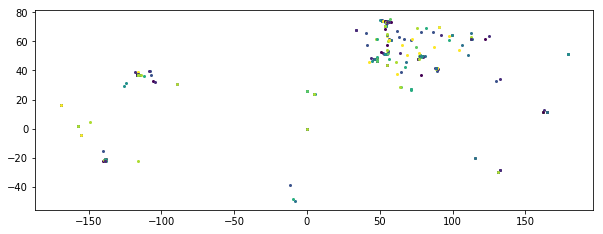

In [31]:
df.plot(figsize=(10,10))

In [32]:
world = gpd.read_file("/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/oklahoma_nuclear/world_shapefile/cntry00.shp")

In [35]:
world = world.to_crs(epsg=4326)
world.head()

,CNTRY_NAME,COLOR_MAP,CURR_CODE,CURR_TYPE,FIPS_CNTRY,GMI_CNTRY,ISO_2DIGIT,ISO_3DIGIT,LANDLOCKED,LONG_NAME,POP_CNTRY,SOVEREIGN,SQKM,SQMI,geometry
0,Russia,1,RUR,Ruble,RS,RUS,RU,RUS,N,Russia,151827600,Russia,16911282.00,6529445.00,(POLYGON ((58.06137847900391 81.68775939941406...
1,Svalbard,3,NOK,Norwegian Krone,SV,SJM,SJ,SJM,N,Svalbard,3148,Norway,61909.10,23903.10,"(POLYGON ((20.8336067199707 80.67414855957031,..."
2,Greenland,7,DKK,Danish Krone,GL,GRL,GL,GRL,N,Greenland,55413,Denmark,2143319.00,827535.44,(POLYGON ((-46.09916687011719 60.8538818359375...
3,Jan Mayen,5,NOK,Norwegian Krone,JN,SJM,SJ,SJM,N,Jan Mayen,-99999,Norway,467.76,180.60,"POLYGON ((-9.0430908203125 70.80386352539062, ..."
4,Iceland,8,ISK,Krona,IC,ISL,IS,ISL,N,Iceland,267240,Iceland,102280.63,39490.54,POLYGON ((-22.02472305297852 64.41888427734375...


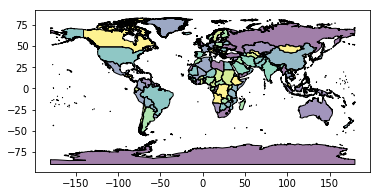

In [36]:
world.plot()

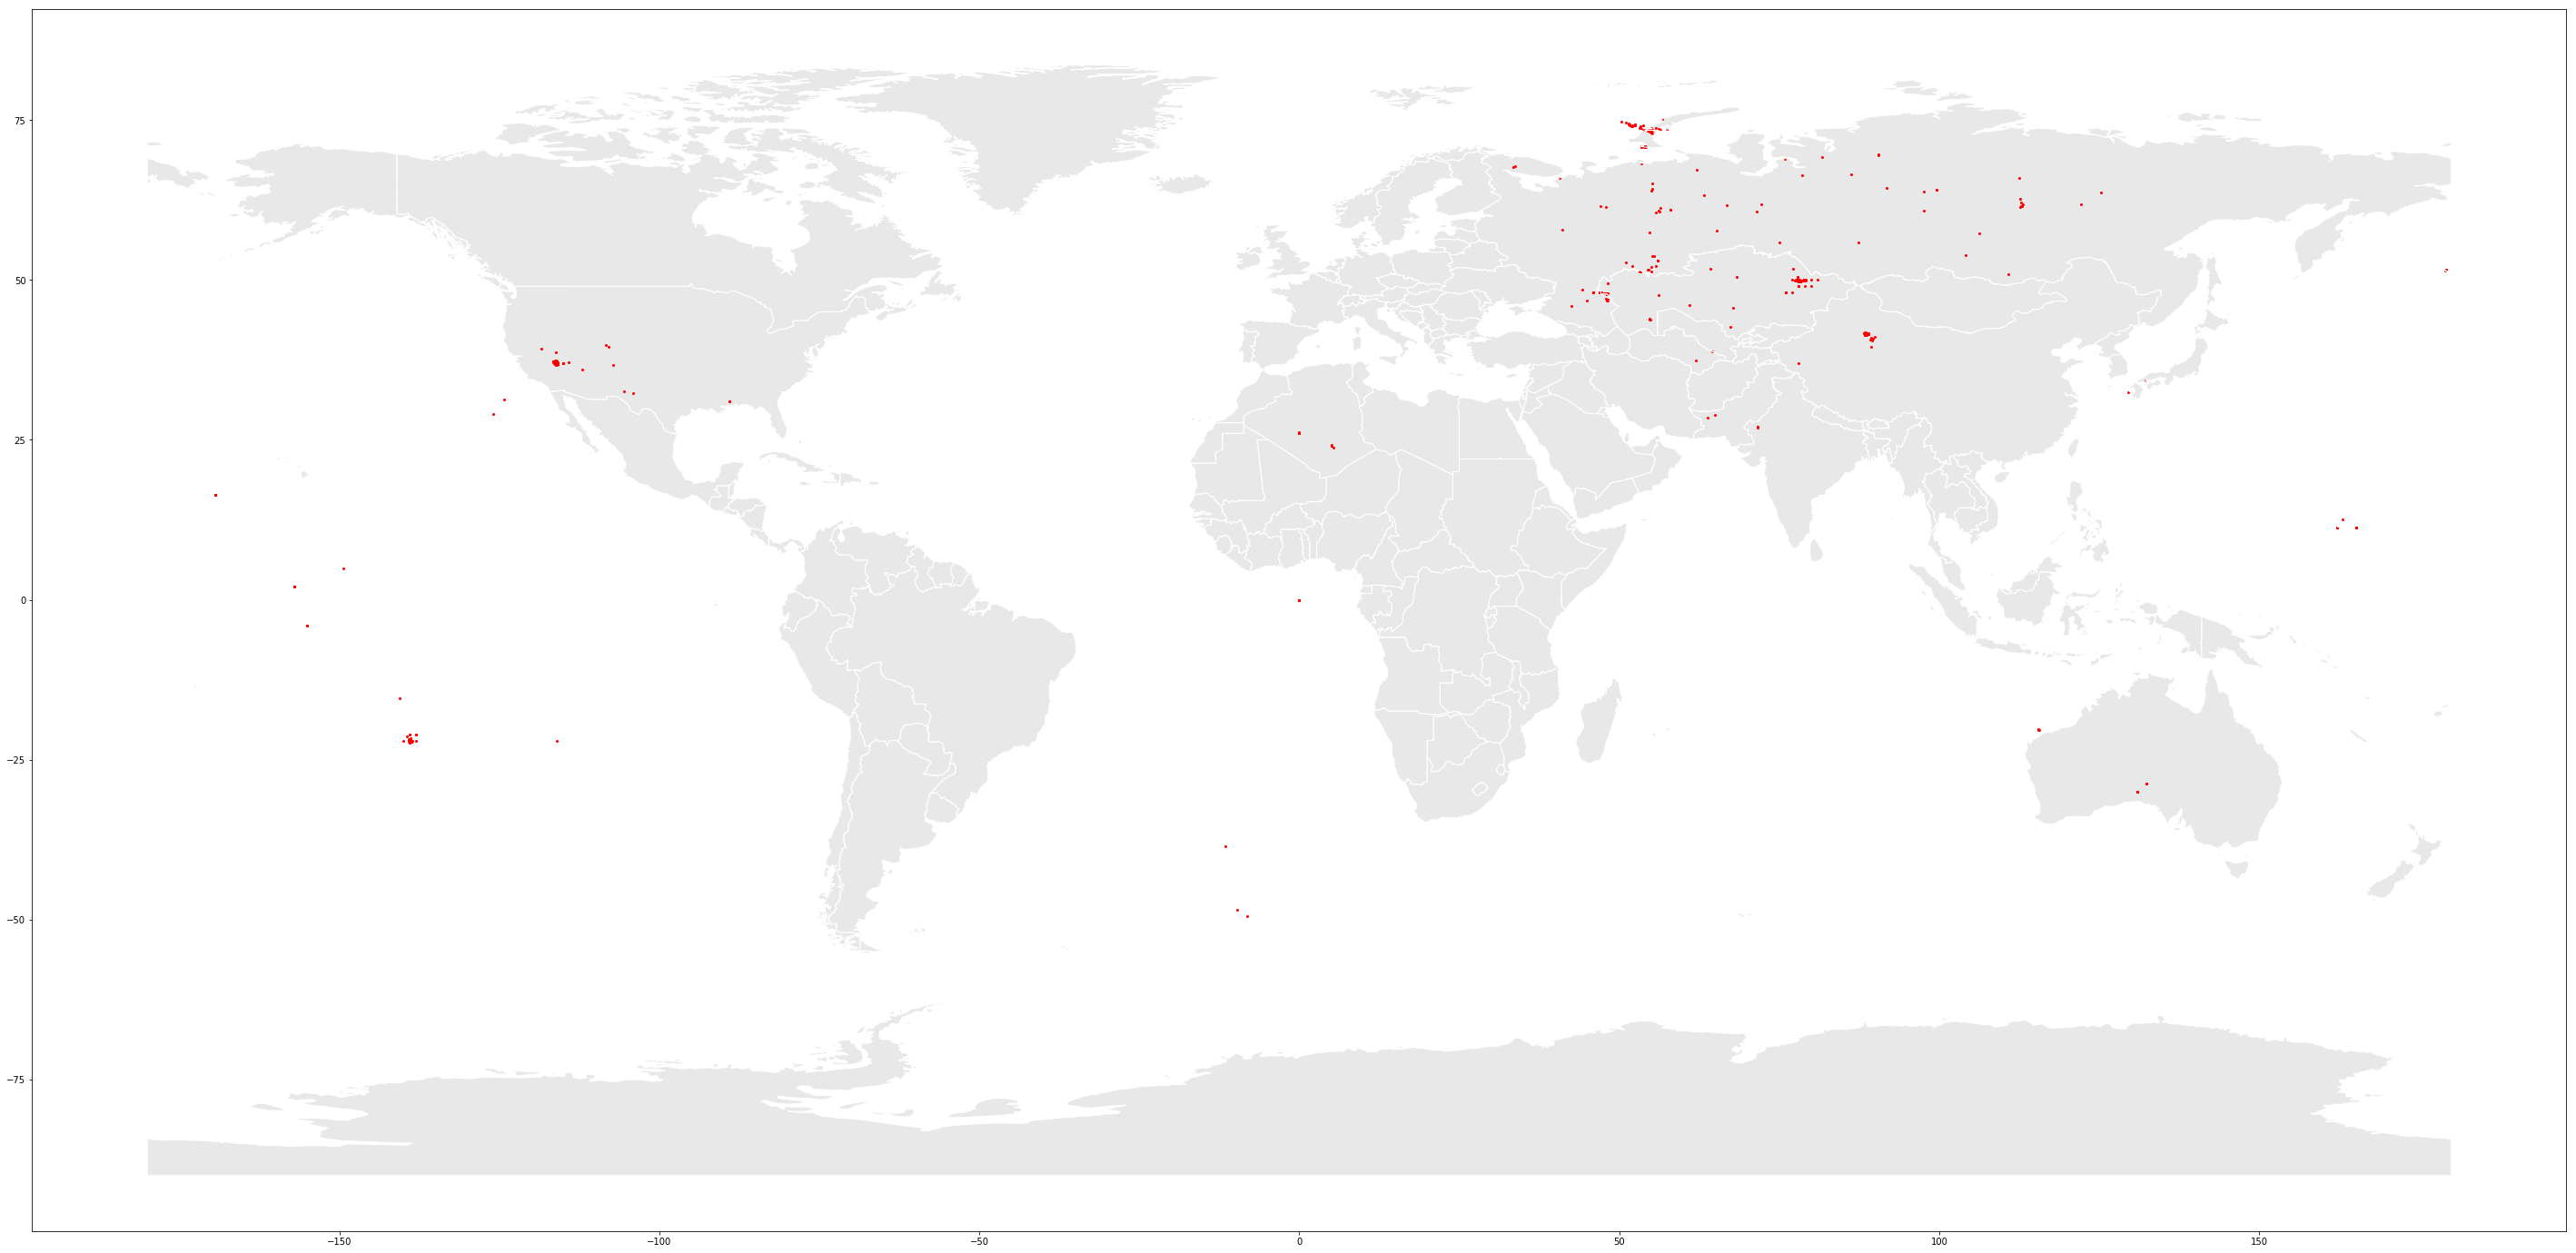

In [38]:
ax = df.plot(figsize=(50,25), color='red', markersize=2)

world.plot(ax=ax, color='lightgrey', edgecolor='white', figsize=(50,25))
ax.axis('off')